# Course 2: Data Analysis Tools - Week 1: Hypothesis Testing and ANOVA

## Peer-graded Assignment: Running an analysis of variance

The assignments for this course start where the Data Management and Visualization course  assignments left off. Now that you have selected a data set and research question, managed your variables of interest and visualized their relationship graphically, we are ready to test those relationships statistically. We have included the codebooks and data sets from Data Management and Visualization for your convenience. 

The first assignment deals with analysis of variance. Analysis of variance assesses whether the means of two or more groups are statistically different from each other. This analysis is appropriate whenever you want to compare the means (quantitative variables) of groups (categorical variables). The null hypothesis is that there is no difference in the mean of the quantitative variable across groups (categorical variable), while the alternative is that there is a difference. Note that if your research question does not include one quantitative variable, you can use one from your data set just to get some practice with the tool. If your research question does not include a categorical variable, you can categorize one that is quantitative.


## Instructions

Run an analysis of variance.

You will need to analyze and interpret post hoc paired comparisons in instances where your original statistical test was significant, and you were examining more than two groups (i.e. more than two levels of a categorical, explanatory variable). 

WHAT TO SUBMIT:

Following completion of the steps described above, create a blog entry where you submit syntax used to run an ANOVA (copied and pasted from your program) along with corresponding output and a few sentences of interpretation. 


## Review Criteria

Your assessment will be based on the evidence you provide that you have completed all of the steps. In all cases, consider that the peer assessing your work is likely not an expert in the field you are analyzing. 

# ANOVA Analysis using the Gap Minder dataset

## Examine life related data in the Gap Minder dataset

Because I'm not sure which data is suitable for this assignment (ANOVA), I have include four types of data. I'll start with life expectancy.

* lifeexpectancy:

    2011 life expectancy at birth (years)
    The average number of years a newborn child would live if current
    mortality patterns were to stay the same.

* suicideper100TH:

    2005 Suicide, age adjusted, per 100 000
    Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted

* breastcancerper100TH:

    2002 breast cancer new cases per 100,000 female
    Number of new cases of breast cancer in 100,000 female residents
    during the certain year.

* HIVrate:

    2009 estimated HIV Prevalence % - (Ages 15-49)
    Estimated number of people living with HIV per 100 population of age
    group 15-49.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.sandbox.stats.multicomp import MultiComparison

%matplotlib inline

In [24]:
gm_data = pd.read_csv('../../datasets/gapminder.csv')
gm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
country                 213 non-null object
incomeperperson         213 non-null object
alcconsumption          213 non-null object
armedforcesrate         213 non-null object
breastcancerper100th    213 non-null object
co2emissions            213 non-null object
femaleemployrate        213 non-null object
hivrate                 213 non-null object
internetuserate         213 non-null object
lifeexpectancy          213 non-null object
oilperperson            213 non-null object
polityscore             213 non-null object
relectricperperson      213 non-null object
suicideper100th         213 non-null object
employrate              213 non-null object
urbanrate               213 non-null object
dtypes: object(16)
memory usage: 26.7+ KB


In [26]:
gm_data.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'],
      dtype='object')

In [33]:
selected_columns = ['country', 'incomeperperson', 'lifeexpectancy', 'suicideper100th', 'breastcancerper100th', 'hivrate']
gm = gm_data[selected_columns].copy()

for col in selected_columns[1:]:
    gm[col] = pd.to_numeric(gm[col], errors='coerce')

In [34]:
gm.head()

,country,incomeperperson,lifeexpectancy,suicideper100th,breastcancerper100th,hivrate
0,Afghanistan,NaN,48.673,6.684385,26.8,NaN
1,Albania,1914.996551,76.918,7.699330,57.4,NaN
2,Algeria,2231.993335,73.131,4.848770,23.5,0.1
3,Andorra,21943.339898,NaN,5.362179,NaN,NaN
4,Angola,1381.004268,51.093,14.554677,23.1,2.0


# Question to answer

Is the life expectancy equal or not equal in four different income level country groups?

Association between Income_level of the country and Life Expectancy:
* Explantatory variable: Income_level of the country (categorical)
* Response variable: Life expectancy

In [36]:
income_pp = gm['incomeperperson']
gm['income_level'] = pd.qcut(income_pp, 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
gm.head()

,country,incomeperperson,lifeexpectancy,suicideper100th,breastcancerper100th,hivrate,income_level
0,Afghanistan,NaN,48.673,6.684385,26.8,NaN,NaN
1,Albania,1914.996551,76.918,7.699330,57.4,NaN,Medium-Low
2,Algeria,2231.993335,73.131,4.848770,23.5,0.1,Medium-Low
3,Andorra,21943.339898,NaN,5.362179,NaN,NaN,High
4,Angola,1381.004268,51.093,14.554677,23.1,2.0,Medium-Low


In [37]:
gm.groupby(['income_level']).size()

income_level
Low            48
Medium-Low     47
Medium-High    47
High           48
dtype: int64

In [39]:
# create a sub data frame and drop NaN entries
gm_in_life = gm[['country', 'income_level', 'lifeexpectancy']].dropna().copy()
gm_in_life.head()

,country,income_level,lifeexpectancy
1,Albania,Medium-Low,76.918
2,Algeria,Medium-Low,73.131
4,Angola,Medium-Low,51.093
6,Argentina,High,75.901
7,Armenia,Medium-Low,74.241


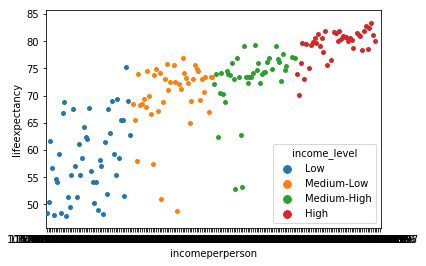

In [51]:
# Plot the scatter plot to see the rough distribution of life expectancy

sns.stripplot(x='incomeperperson', y='lifeexpectancy', hue='income_level', data=gm)

# Answer is Yes

The answer is Yes because we have a very small F-statistic probabilty.

But we have four categories for the explanatory variable, so we have to conduct the post hoc test.

In [46]:
# ANOVA: Explanatory variables with more than 2 levels
model_in_life = smf.ols(formula='lifeexpectancy ~ C(income_level)', data=gm_in_life)
result_in_life = model_in_life.fit()
result_in_life.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     98.07
Date:                Fri, 16 Mar 2018   Prob (F-statistic):           4.80e-37
Time:                        15:37:27   Log-Likelihood:                -561.91
No. Observations:                 176   AIC:                             1132.
Df Residuals:                     172   BIC:                             1145.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         58.3588      0.860     67.827      0.000      56.661      60.057
C(income_level)[T.Medium-Low]     11.6391      1.244      9.355      0.000       9.183      14.095
C(income_level)[T.Medium-High]    14.1737      1.252     11.324      0.000      11.703      16.644
C(income_level)[T.High]           21.1340      1.268     16.672      0.000      18.632      23.636
==============================================================================
Omnibus:                       42.859   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.437
Skew:                          -1.127   Prob(JB):                     1.70e-19
Kurtosis:                       5.591   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$ f = \frac{Variation\ among\ sample\ means} {Variation\ within\ groups} $

$ p-value \leq 0.05 $

In [65]:
print(f'F-statistic: {result_in_life.fvalue}')
print(f'Prob (F-statistic): {result_in_life.f_pvalue}')

F-statistic: 98.06760955677281
Prob (F-statistic): 4.798254910855845e-37


In [53]:
print('Means for life expectancy by income level')
mean_in_life= gm_in_life.groupby('income_level').mean()
print(mean_in_life)

print('Standard deviations for life expectancy by income level')
std_in_life= gm_in_life.groupby('income_level').std()
print(std_in_life)


Means for life expectancy by income level
              lifeexpectancy
income_level                
Low                58.358812
Medium-Low         69.997955
Medium-High        72.532465
High               79.492780
Standard deviations for life expectancy by income level
              lifeexpectancy
income_level                
Low                 7.146260
Medium-Low          6.108889
Medium-High         6.543514
High                2.777572


# Post Hoc Test

Explanatory Vairable (income level) has more than two groups. (four here)

Therefore, a significant ANOVA doesn't tell us which groups are different from the others.

Prevent type 1 error: Reject the null hypothesis when it is true. (i.e. there is no difference in life expectancy).

[Tukey's range test](https://en.wikipedia.org/wiki/Tukey%27s_range_test)

All but the "Medium-High" versus "Medium-Low" group reject the null hypothesis.


In [61]:
mc = MultiComparison(gm_in_life['lifeexpectancy'], gm_in_life['income_level'])
res = mc.tukeyhsd()
print(res.summary())

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1      group2   meandiff  lower    upper  reject
--------------------------------------------------------
    High        Low     -21.134  -24.4229 -17.845  True 
    High    Medium-High -6.9603  -10.3362 -3.5844  True 
    High     Medium-Low -9.4948  -12.8519 -6.1377  True 
    Low     Medium-High 14.1737  10.9262  17.4211  True 
    Low      Medium-Low 11.6391   8.4112   14.867  True 
Medium-High  Medium-Low -2.5345  -5.8509   0.7819 False 
--------------------------------------------------------
